# House Prices: Advanced Regression Techniques

## [Kaggle Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Workflow
1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.


### Workflow goals

The data science solutions workflow solves for seven major goals.

**Classifying:** We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating:** One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting:** For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing.** Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting:** We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating:** Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting:** How to select the right visualization plots and charts depending on nature of the data and the solution goals.

# 1. Competition Description
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# 2. Acquire training and test data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv('data/train.csv')  
df_test = pd.read_csv('data/test.csv')
combine = [df_train, df_test]

In [3]:
df_train.shape

(1460, 81)

In [4]:
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
df_test.shape

(1459, 80)

In [6]:
df_test.sort_values(by='Id').head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [7]:
df_test.interpolate().isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt         0
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond

In [8]:
f = open("data/data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 3. Feature Engineering

In [9]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 3.1 MSSubClass 
Change feature values to be represented by number from 1 and up.

**Feature Description:**  
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       
**Feature Engineering:**
Create a binary feature where 1 is 1 story and 0 is more than 1 story.

In [10]:
df_train.MSSubClass.isna().sum()

0

In [11]:
df_train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [12]:
one_story_nums = [20, 30, 40, 120]

def mssubclass_feateng(input):
    if input in one_story_nums:
        return 1
    else:
        return 0

In [13]:
df_train['MSSubClass_1story'] = df_train.apply(lambda x: mssubclass_feateng(x.MSSubClass), axis=1)

In [14]:
df_train.MSSubClass_1story.value_counts()

0    764
1    696
Name: MSSubClass_1story, dtype: int64

In [15]:
df_train['MSSubClass_1story'] = df_train['MSSubClass_1story'].astype('category')

In [16]:
df_train.drop('MSSubClass', axis=1, inplace=True)
df_train.head()

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story
0,1,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0
1,2,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0
3,4,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0
4,5,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0


## 3.2 MSZoning

**Feature Description:**  
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [17]:
df_train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [18]:
### Create dummies to handle categorical feature

In [19]:
df_train = pd.concat([df_train.drop('MSZoning', axis=1), pd.get_dummies(df_train['MSZoning'], prefix='MSZoning')], axis=1)

In [20]:
df_train.head()

,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_1story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,208500,0,0,0,0,1,0
1,2,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,181500,1,0,0,0,1,0
2,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,223500,0,0,0,0,1,0
3,4,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,140000,0,0,0,0,1,0
4,5,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,250000,0,0,0,0,1,0


## 3.3 LotFrontage

In [21]:
df_train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
df_train.LotFrontage.isna().sum()

259

### Drop LotFrontage
Drop this feature as there are 259 NaNs which is close to 20% of the samples.

An alternative would be to estimate the LotFrontage based on the LotArea.

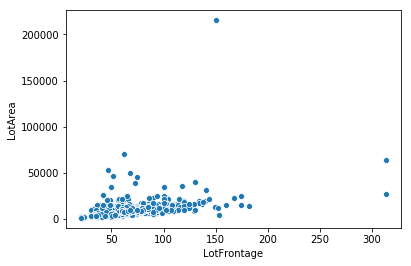

In [23]:
sns.scatterplot(x='LotFrontage', y='LotArea', data=df_train)

In [24]:
df_train.drop('LotFrontage', axis=1, inplace=True)

## 3.4 Lot Area

In [25]:
df_train.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

**Remove outliers**

In [26]:
df_train = df_train[df_train['LotArea'] < 150000]

In [27]:
df_train.LotArea.describe()

count      1457.000000
mean      10168.609472
std        6281.850623
min        1300.000000
25%        7540.000000
50%        9473.000000
75%       11600.000000
max      115149.000000
Name: LotArea, dtype: float64

## 3.5 Street
Drop this feature as 99.7% has the same value.

In [28]:
df_train.Street.value_counts()

Pave    1452
Grvl       5
Name: Street, dtype: int64

In [29]:
df_train.drop('Street', axis=1, inplace=True)

## 3.6 Alley

In [30]:
df_train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [31]:
df_train.Alley.isna().sum()

1366

**Drop Alley feature as 1366 of 1452 are NaNs**

In [32]:
df_train.drop('Alley', axis=1, inplace=True)

## 3.7 LotShape

**Feature Description**  
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

In [33]:
df_train.LotShape.value_counts()

Reg    925
IR1    483
IR2     40
IR3      9
Name: LotShape, dtype: int64

In [34]:
df_train.LotShape.isna().sum()

0

**Replace LotShape with binary feature LotShape_regular**

In [35]:
df_train['LotShape_regular'] = df_train.apply(lambda x: 1 if x.LotShape == "Reg" else 0, axis=1)

In [36]:
df_train.LotShape_regular.value_counts()

1    925
0    532
Name: LotShape_regular, dtype: int64

In [37]:
df_train.drop('LotShape_regular', axis=1, inplace=True)

## 3.8 Land Contour
**Feature Description**  
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

In [38]:
df_train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      49
Low      34
Name: LandContour, dtype: int64

In [39]:
df_train.LandContour.isna().sum()

0

In [40]:
df_train['LandContour_level'] = df_train.apply(lambda x: 1 if "Lvl" in x.LandContour else 0, axis=1)

In [41]:
df_train.LandContour_level.value_counts()

1    1311
0     146
Name: LandContour_level, dtype: int64

In [42]:
df_train.drop('LandContour', axis=1, inplace=True)

## 3.9 Utilities
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [43]:
df_train.Utilities.value_counts()

AllPub    1456
NoSeWa       1
Name: Utilities, dtype: int64

**Drop this feature as all but one sample are the same**

In [44]:
df_train.drop('Utilities', axis=1, inplace=True)

## 3.10 LotConfig
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [45]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [46]:
df_train.LotConfig.isna().sum()

0

In [47]:
df_train['LotConfig'] = df_train.apply(lambda x: x.LotConfig[:2] if "FR" in x.LotConfig else x.LotConfig, axis=1)

In [48]:
df_train.LotConfig.value_counts()

Inside     1051
Corner      262
CulDSac      93
FR           51
Name: LotConfig, dtype: int64

In [49]:
df_train = pd.concat([df_train.drop('LotConfig', axis=1), pd.get_dummies(df_train['LotConfig'], prefix='LotConfig')], axis=1)

## 3.11 LandSlope
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

In [50]:
df_train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      10
Name: LandSlope, dtype: int64

In [51]:
df_train.LandSlope.isna().sum()

0

In [52]:
df_train = pd.concat([df_train.drop('LandSlope', axis=1), pd.get_dummies(df_train['LandSlope'], prefix='LandSlope')], axis=1)

# 4. Analysis

## 4.1 Correlation Matrix

In [53]:
cols = df_train.columns.tolist()
n = int(cols.index('SalePrice'))
cols =  cols[:n] + cols[n+1:] + [cols[n]]
df_train = df_train[cols]

In [54]:
corr_mat = df_train.corr()

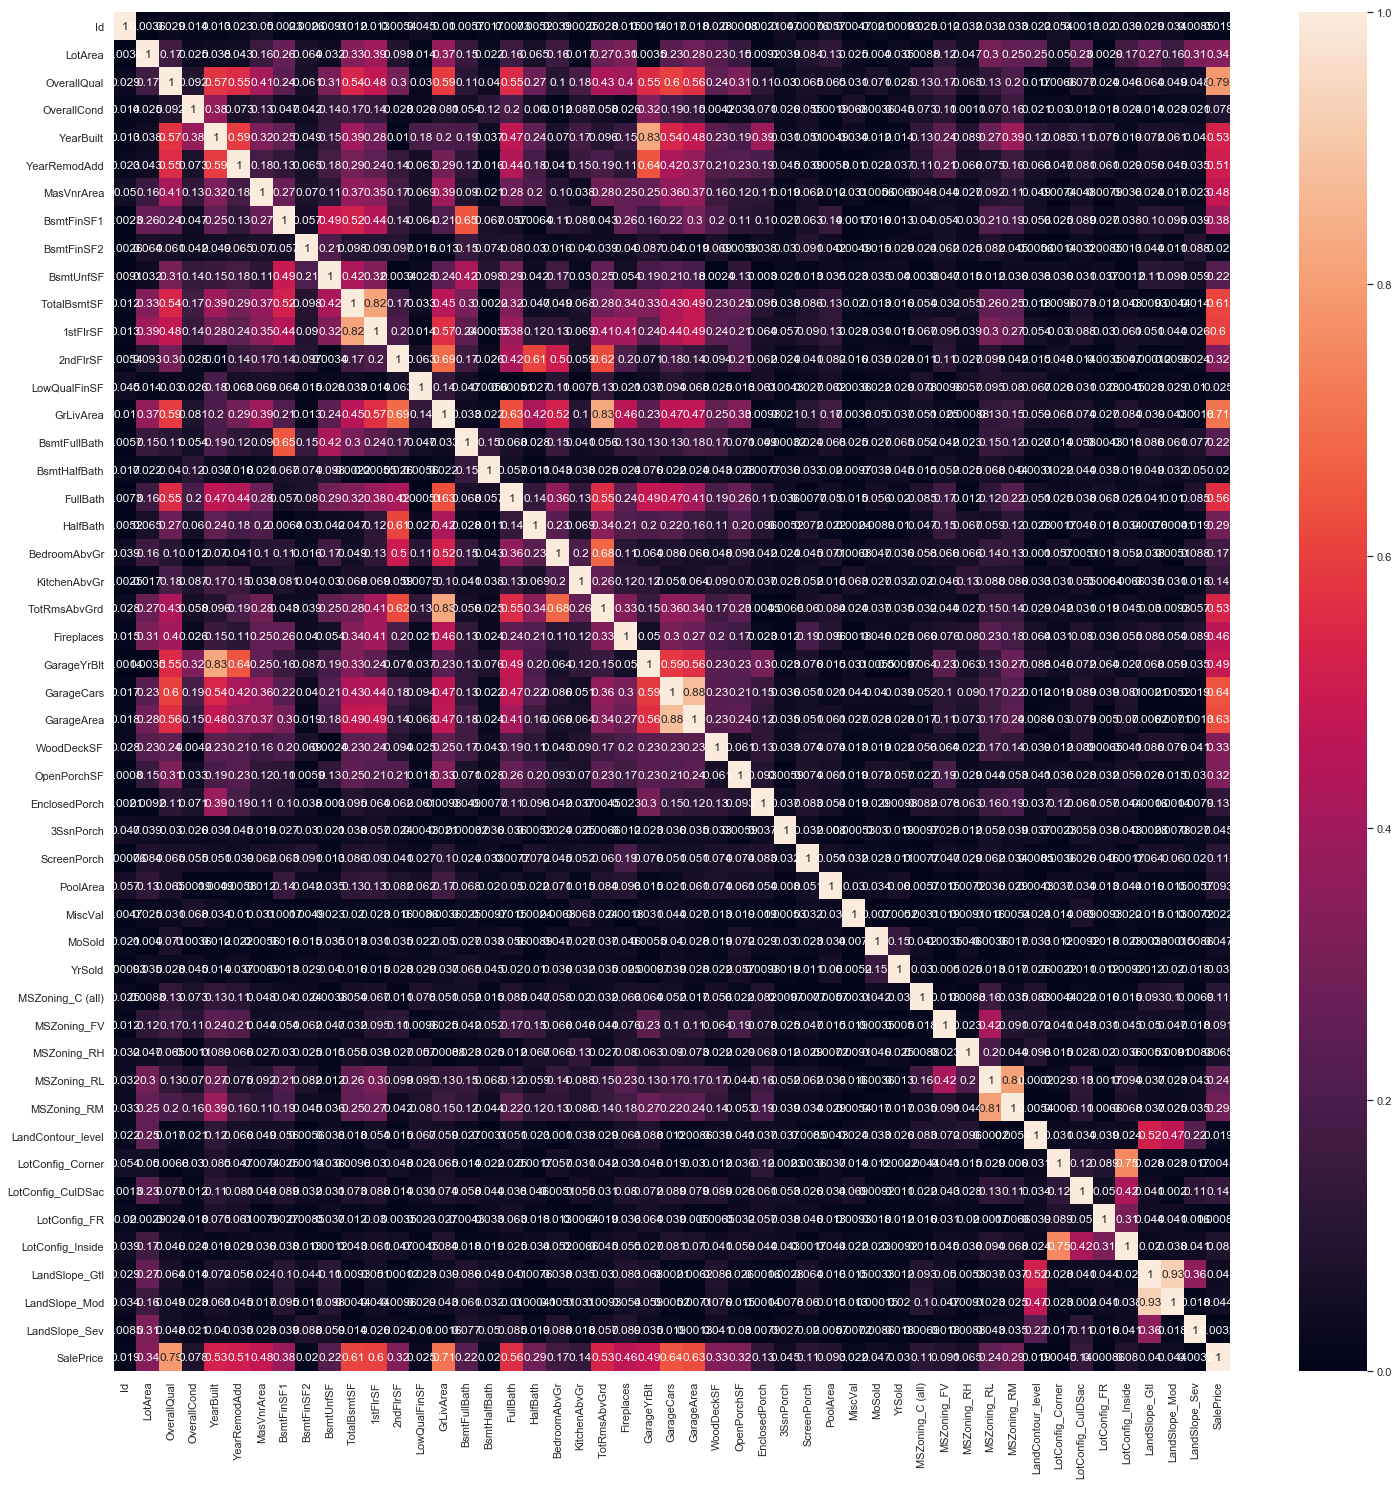

In [55]:
sns.set(rc={'figure.figsize':(25,25)})

ax = sns.heatmap(abs(corr_mat), annot=True)

In [56]:
corr_mat[corr_mat['SalePrice'].abs().sort_values(ascending=False) > 0.5]

/Users/bjornar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MSZoning_RM,LandContour_level,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,SalePrice
OverallQual,-0.028531,0.168342,1.000000,-0.091528,0.572544,0.551388,0.412750,0.240500,-0.061452,0.308474,...,-0.195684,0.017397,-0.006555,0.076603,0.024090,-0.046027,0.063907,-0.049187,-0.048043,0.792692
YearBuilt,-0.013346,0.037924,0.572544,-0.375917,1.000000,0.593536,0.316710,0.250750,-0.048820,0.148997,...,-0.389036,0.117663,-0.085146,0.113202,0.074815,-0.019456,0.072092,-0.061225,-0.039847,0.525154
YearRemodAdd,-0.022515,0.043123,0.551388,0.072878,0.593536,1.000000,0.177893,0.130792,-0.064566,0.179759,...,-0.162265,0.066145,-0.046515,0.081256,0.061012,-0.029471,0.055516,-0.045441,-0.034956,0.510137
TotalBsmtSF,-0.012457,0.329378,0.538950,-0.171848,0.393309,0.293817,0.365664,0.520458,0.097513,0.419186,...,-0.246838,-0.018050,0.009627,0.073483,-0.012199,-0.043311,-0.009322,0.004436,0.013857,0.611589
1stFlrSF,0.013404,0.394927,0.477221,-0.144803,0.283408,0.242967,0.346258,0.443510,0.090269,0.321395,...,-0.266522,-0.054152,0.030428,0.087716,-0.030323,-0.061460,-0.050609,0.043582,0.026470,0.604042
GrLivArea,0.010232,0.368518,0.593667,-0.080651,0.199788,0.288094,0.390780,0.206555,-0.013002,0.241473,...,-0.153631,-0.058503,0.064545,0.073520,-0.027267,-0.084196,-0.039230,0.042640,-0.001628,0.708303
FullBath,0.007261,0.156720,0.551271,-0.195033,0.469080,0.440255,0.276984,0.056504,-0.079921,0.290267,...,-0.216497,0.051317,-0.025345,0.038384,0.062544,-0.024857,0.041229,-0.010085,-0.085128,0.560216
TotRmsAbvGrd,0.028321,0.272067,0.427525,-0.057659,0.095893,0.192587,0.281305,0.042865,-0.038620,0.251770,...,-0.141435,-0.029022,0.041520,0.031083,-0.019115,-0.044677,0.030011,-0.009300,-0.057066,0.533438
GarageCars,0.017246,0.229048,0.600996,-0.186152,0.538138,0.421276,0.364651,0.223703,-0.039686,0.214754,...,-0.221628,0.012013,0.019453,0.088998,0.039460,-0.081364,0.002070,0.005194,-0.018527,0.641281
GarageArea,0.017642,0.284734,0.562316,-0.151299,0.478988,0.372575,0.374444,0.297264,-0.019188,0.183915,...,-0.235627,0.008642,0.029751,0.078727,0.005017,-0.070466,-0.006187,0.007146,-0.001310,0.625065


In [57]:
correlated_cols = list(corr_mat[corr_mat.SalePrice.abs()>0.5].index)
correlated_cols.append('Id')
correlated_cols;

## Random Forest

In [58]:
X_train = df_train.copy()[correlated_cols].drop("SalePrice", axis=1)
Y_train = df_train["SalePrice"]
correlated_cols.remove('SalePrice')
X_test  = df_test.copy()[correlated_cols].interpolate()
X_train.shape, Y_train.shape, X_test.shape

((1457, 11), (1457,), (1459, 11))

In [59]:
X_test.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
Id              0
dtype: int64

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [61]:
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

# 7. Submit results

In [62]:
df_sample_submission = pd.read_csv('sample_submission.csv')  
df_sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [63]:
submission = pd.DataFrame({ "Id": df_test["Id"], "SalePrice": Y_pred
                          })

In [64]:
submission.to_csv('submission.csv')